In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [5]:
titanic=pd.read_csv("C://Users//nazee//Downloads//2dfd2de0d4f8727f873422c5d959fff5-fa71405126017e6a37bea592440b4bee94bf7b9e//2dfd2de0d4f8727f873422c5d959fff5-fa71405126017e6a37bea592440b4bee94bf7b9e//titanic.csv")

In [6]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.shape

(891, 12)

In [9]:
index=titanic.index

In [10]:
index

RangeIndex(start=0, stop=891, step=1)

In [13]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Analysing Data

### Countplot is used to count the values for a given x values 

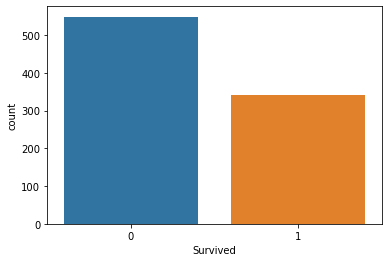

In [16]:
sns.countplot(x="Survived",data=titanic)

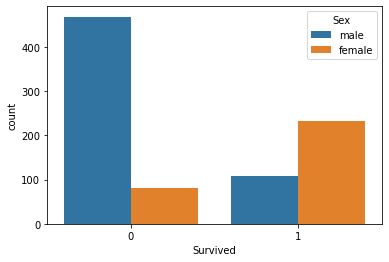

In [20]:
sns.countplot(x="Survived", hue="Sex", data=titanic)

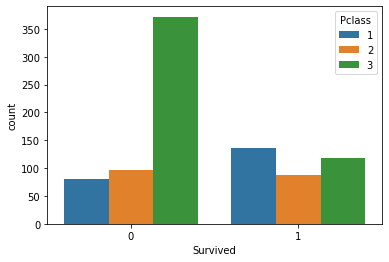

In [21]:
sns.countplot(x="Survived",hue="Pclass",data=titanic )

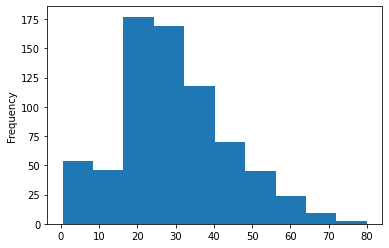

In [23]:
titanic['Age'].plot.hist()

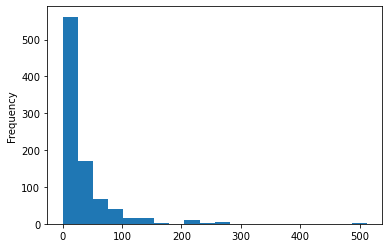

In [24]:
titanic["Fare"].plot.hist(bins=20)

In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


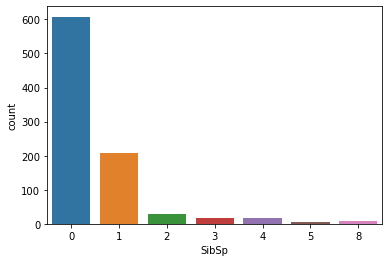

In [28]:
sns.countplot(x="SibSp",data=titanic)

## Data wrangling

## Deleting the unecessary data

In [30]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

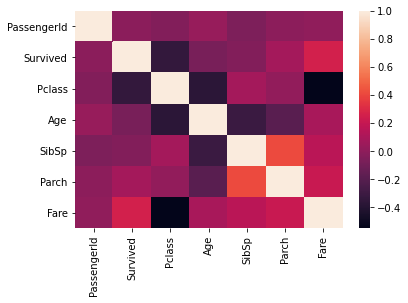

In [31]:
sns.heatmap(titanic.corr())

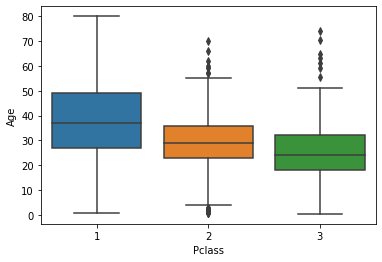

In [35]:
sns.boxplot(x="Pclass",y="Age",data=titanic)

In [36]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
titanic.drop("Cabin",axis=1,inplace=True)

In [39]:
titanic.dropna(inplace=True)

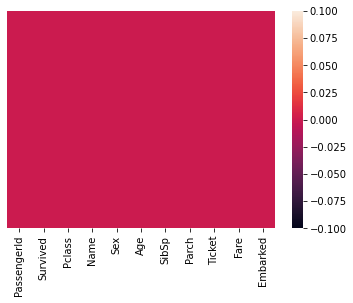

In [41]:
sns.heatmap(titanic.isnull(),yticklabels=False)

In [49]:
sex=pd.get_dummies(titanic["Sex"],drop_first=True)

In [46]:
embark=pd.get_dummies(titanic['Embarked'],drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [48]:
pc1=pd.get_dummies(titanic["Pclass"],drop_first=True)
pc1.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [59]:
pd.concat([titanic,sex,embark,pc1],axis=1)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,0,1,0,0,1,0,1,0,0,1
886,0,27.0,0,0,13.0000,1,0,1,1,0,1,0,1,1,0
887,1,19.0,0,0,30.0000,0,0,1,0,0,0,0,1,0,0
889,1,26.0,0,0,30.0000,1,0,0,0,0,1,0,0,0,0


## titanic.drop(["Sex","Embarked","PassengerId","Name","Ticket","Pclass"],axis=1,inplace=True)

In [61]:
titanic.head(5)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## train data

In [66]:
y=titanic["Survived"]
x=titanic.iloc[:,1:]

In [67]:
x.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [75]:
logmodel=LogisticRegression()

In [76]:
logmodel.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [77]:
prediction=logmodel.predict(x_test)

In [89]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [90]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.81       126\n           1       0.72      0.72      0.72        88\n\n    accuracy                           0.77       214\n   macro avg       0.76      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

In [91]:
confusion_matrix(y_test,prediction)

array([[102,  24],
       [ 25,  63]], dtype=int64)

In [92]:
accuracy_score(y_test,prediction)

0.7710280373831776